In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
import os
from tensorflow import keras
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

# Load Reddit comments

In [2]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2020-09.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [3]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2020-10.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [4]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2020-11.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [5]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2020-12.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [6]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2021-01.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [7]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2021-02.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [8]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2021-03.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [9]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2021-04.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [10]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2021-05.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [11]:
with zipfile.ZipFile('../Data/RawBitcoinComments/bitcoin2021-06.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/RawBitcoinComments/')

In [64]:
dfdtypes = {'author_premium': bool,'body': object,'controversiality': np.int64,'created_utc': np.int64,'id': object,'locked': bool,'no_follow': bool,'score': np.int64}

li = []
df1 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-01.csv', dtype=dfdtypes)
li.append(df1)
df2 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-02.csv', dtype=dfdtypes)
li.append(df2)
df3 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-03.csv', dtype=dfdtypes)
li.append(df3)
df4 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-04.csv', dtype=dfdtypes)
li.append(df4)
df5 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-05.csv', dtype=dfdtypes)
li.append(df5)
df6 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-06.csv', dtype=dfdtypes)
li.append(df6)
df7 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-07.csv', dtype=dfdtypes)
li.append(df7)
df8 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-08.csv', dtype=dfdtypes)
li.append(df8)
df9 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-09.csv', dtype=dfdtypes)
li.append(df9)
df10 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-10.csv', dtype=dfdtypes)
li.append(df10)
df11 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-11.csv', dtype=dfdtypes)
li.append(df11)
df12 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2020-12.csv', dtype=dfdtypes)
li.append(df12)
df13 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2021-01.csv', dtype=dfdtypes)
li.append(df13)
df14 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2021-02.csv', dtype=dfdtypes)
li.append(df14)
df15 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2021-03.csv', dtype=dfdtypes)
li.append(df15)
df16 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2021-04.csv', dtype=dfdtypes)
li.append(df16)
df17 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2021-05.csv', dtype=dfdtypes)
li.append(df17)
df18 = pd.read_csv('../Data/RawBitcoinComments/bitcoin2021-06.csv', dtype=dfdtypes)
li.append(df18)

df = pd.concat(li, axis=0, ignore_index=True)

c:\users\emaibach\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [65]:
df["created_utc"] = pd.to_datetime(df["created_utc"],unit='s')

In [66]:
df["retrieved_on"] = pd.to_datetime(df["retrieved_on"],unit='s')

In [67]:
df = df[df['body'] != "[removed]"]

In [68]:
df = df[df['body'] != "[deleted]"]

In [69]:
df["created_utc"] = pd.to_datetime(df["created_utc"].dt.date)

In [70]:
df["body"] = df["body"].astype(str)

In [71]:
df = df[df['body'].isna() == False]

In [72]:
df['body'] = df['body'].str.lower()

# Group Comments By Day And Do Bag Of Words Counts

In [73]:
dfbyday = df[["created_utc","id","author_premium","controversiality", "locked", "no_follow", "score", "body"]].groupby(["created_utc"]).agg({"id": ["count"], "author_premium": ["sum"], "controversiality": ["sum"], "locked" : ["sum"], "no_follow" : ["sum"], "score" : [np.mean], "body": ' '.join})

In [74]:
dfbyday = dfbyday.droplevel(axis=1, level=0).reset_index().set_axis(["Date", "CommentCount", "PremiumCount", "Controversiality", "LockedCount", "FollowCount", "Score", "Body"], axis=1, inplace=False)

In [75]:
vectorizer = CountVectorizer(min_df=0.10, max_df=0.90, ngram_range=(1,3))

In [76]:
wordvector = vectorizer.fit_transform(dfbyday['Body'])

In [82]:
wordvectordf = pd.DataFrame(wordvector.todense(), columns=vectorizer.get_feature_names_out())

In [83]:
dfbydayvector = pd.concat([dfbyday[["Date"]], wordvectordf], axis=1)

# Load BitCoin price history

In [77]:
dfprice = pd.read_csv('../Data/BitcoinPrice/bitcoinprice2020-21.csv')

In [78]:
dfprice["Date"] = pd.to_datetime(dfprice["Date"], infer_datetime_format=True)  

In [79]:
dfprice["Change %"] = dfprice["Change %"].str.rstrip('%').astype('float') / 100.0

In [80]:
dfprice["NextDayChange"] = dfprice["Change %"].shift(-1)

In [84]:
dfvectorprice = pd.merge(dfbydayvector, dfprice[["Date", "NextDayChange"]], left_on="Date", right_on="Date", how="outer")

In [30]:
dfvectorprice = dfvectorprice[dfvectorprice['0000'].isna() == False].copy()

In [31]:
conditions = [
               (dfvectorprice["NextDayChange"] <= -0.025), 
               (dfvectorprice["NextDayChange"] > -0.025) & (dfvectorprice["NextDayChange"] < 0.025),
               (dfvectorprice["NextDayChange"] >= 0.025)
             ]
values = [0, 1, 2]
dfvectorprice['ChangeGroup'] = np.select(conditions, values)

In [32]:
dfvectorprice = dfvectorprice.drop(['NextDayChange', 'Date'], axis=1)

# Create Train, Test, and Validation data sets

In [33]:
dfvectorprice_train, dfvectorprice_test = train_test_split(dfvectorprice, test_size=0.4)

In [34]:
dfvectorprice_test, dfvectorprice_valid = train_test_split(dfvectorprice_test, test_size=0.5)

In [35]:
X_train = dfvectorprice_train.drop(['ChangeGroup'], axis=1).to_numpy()

In [36]:
y_train = dfvectorprice_train[["ChangeGroup"]].to_numpy()

In [37]:
X_test = dfvectorprice_test.drop(['ChangeGroup'], axis=1).to_numpy()

In [38]:
y_test = dfvectorprice_test[["ChangeGroup"]].to_numpy()

In [39]:
X_valid = dfvectorprice_valid.drop(['ChangeGroup'], axis=1).to_numpy()

In [40]:
y_valid = dfvectorprice_valid[["ChangeGroup"]].to_numpy()

# Analyze

In [41]:
cgdf = dfvectorprice_train[["ChangeGroup"]].copy()

In [42]:
cgdf["Change Group"] = ""

In [43]:
cgdf.loc[cgdf['ChangeGroup'] == 0, 'Change Group'] = "Decrease"
cgdf.loc[cgdf['ChangeGroup'] == 1, 'Change Group'] = "No Change"
cgdf.loc[cgdf['ChangeGroup'] == 2, 'Change Group'] = "Increase"

Text(0, 0.5, '')

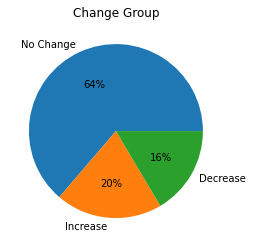

In [44]:
ax = cgdf["Change Group"].value_counts().plot.pie(autopct='%1.0f%%', title="Change Group", legend=False)
ax.set_ylabel('')

# Find 20 Best Words For Predicting Price

In [45]:
seletbest = SelectKBest(k=20).fit(X_train, y_train.ravel())

In [46]:
X_trainnew = seletbest.transform(X_train)

In [47]:
X_testnew = seletbest.transform(X_test)

In [48]:
X_validnew = seletbest.transform(X_valid)

# Build Neural Network

In [49]:
root_logdir = os.path.join(os.curdir, "tensor_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[20,]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [52]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_trainnew, y_train, epochs=30, validation_data=(X_validnew, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
11/11 [==============================] - 1s 98ms/step - loss: 1.0858 - accuracy: 0.4268 - val_loss: 1.1432 - val_accuracy: 0.3727
Epoch 2/30
11/11 [==============================] - 0s 13ms/step - loss: 1.0523 - accuracy: 0.5213 - val_loss: 1.0488 - val_accuracy: 0.5545
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 1.0050 - accuracy: 0.6098 - val_loss: 1.0195 - val_accuracy: 0.5727
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 0.9790 - accuracy: 0.6646 - val_loss: 1.0251 - val_accuracy: 0.6000
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 0.9541 - accuracy: 0.6646 - val_loss: 0.9934 - val_accuracy: 0.5909
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.9356 - accuracy: 0.6921 - val_loss: 0.9856 - val_accuracy: 0.5909
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 0.9183 - accuracy: 0.6890 - val_loss: 0.9776 - val_accuracy: 0.6091
Epoch 8/30
11/11 [

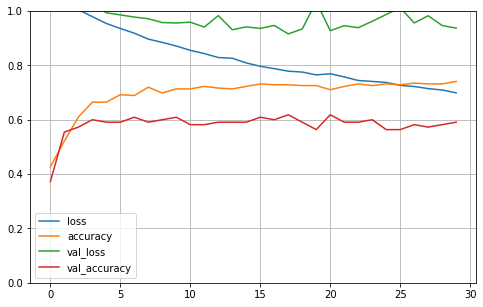

In [53]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [54]:
model.evaluate(X_testnew, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.9196 - accuracy: 0.5963


[0.9196133613586426, 0.5963302850723267]

In [55]:
y_proba = model.predict(X_testnew)
indexes = tf.argmax(y_proba, axis=1)
indexes

<tf.Tensor: shape=(109,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)>

In [57]:
resultdf = pd.DataFrame(indexes)
resultdf["Change Group"] = "Unknown"
resultdf.loc[resultdf[0] == 0, 'Change Group'] = "Decrease"
resultdf.loc[resultdf[0] == 1, 'Change Group'] = "No Change"
resultdf.loc[resultdf[0] == 2, 'Change Group'] = "Increase"

Text(0, 0.5, '')

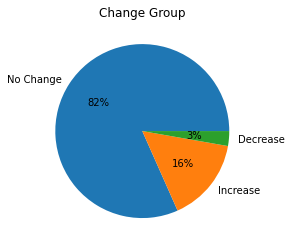

In [58]:
ax = resultdf["Change Group"].value_counts().plot.pie(autopct='%1.0f%%', title="Change Group", legend=False)
ax.set_ylabel('')

In [63]:
resultdf[resultdf[0] == 2].join(pd.DataFrame(y_test), lsuffix='_x', rsuffix='_y')

,0_x,Change Group,0_y
13,2,Increase,1
17,2,Increase,2
20,2,Increase,2
30,2,Increase,1
32,2,Increase,2
40,2,Increase,1
42,2,Increase,1
45,2,Increase,1
53,2,Increase,1
54,2,Increase,2


In [64]:
seletbest = SelectKBest(k=100).fit(X_train, y_train.ravel())

In [65]:
X_trainnew = seletbest.transform(X_train)

In [66]:
X_testnew = seletbest.transform(X_test)

In [67]:
X_validnew = seletbest.transform(X_valid)

In [71]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[100,]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [72]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [73]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_trainnew, y_train, epochs=30, validation_data=(X_validnew, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
11/11 [==============================] - 1s 65ms/step - loss: 1.3280 - accuracy: 0.4207 - val_loss: 1.1908 - val_accuracy: 0.5364
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 1.1129 - accuracy: 0.5610 - val_loss: 1.9216 - val_accuracy: 0.3000
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 1.1622 - accuracy: 0.5152 - val_loss: 1.0534 - val_accuracy: 0.5727
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.8901 - accuracy: 0.6677 - val_loss: 1.4701 - val_accuracy: 0.5636
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.8983 - accuracy: 0.7012 - val_loss: 0.9969 - val_accuracy: 0.5818
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.7873 - accuracy: 0.7165 - val_loss: 1.5738 - val_accuracy: 0.3818
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 0.8571 - accuracy: 0.6982 - val_loss: 0.9812 - val_accuracy: 0.6182
Epoch 8/30
11/11 [=

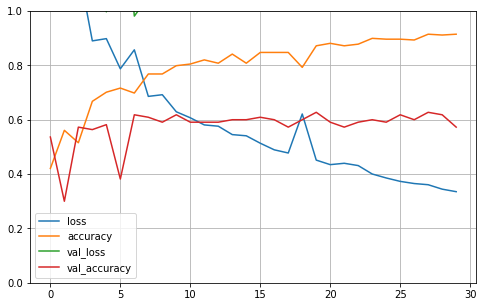

In [74]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [75]:
model.evaluate(X_testnew, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 1.5535 - accuracy: 0.5872


[1.5535143613815308, 0.5871559381484985]